In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

def create_synthetic_data(num_samples=100, num_features=5):
    """
    Generates a synthetic dataset for a two-class classification problem.
    """
    X = np.random.rand(num_samples, num_features) * 10
    y = np.random.randint(0, 2, num_samples)
    return X, y

def get_performance_metrics(model, X_train, y_train, X_test, y_test):
    """
    Calculates confusion matrix, classification report, and infers model fit.
    """
    # Predict on training data
    y_train_pred = model.predict(X_train)
    cm_train = confusion_matrix(y_train, y_train_pred)
    report_train = classification_report(y_train, y_train_pred, output_dict=True)

    # Predict on test data
    y_test_pred = model.predict(X_test)
    cm_test = confusion_matrix(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred, output_dict=True)

    # Calculate accuracies for inference
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Infer model fit
    if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
        model_fit_inference = "Overfit"
    elif train_accuracy < 0.6 and test_accuracy < 0.6:
        model_fit_inference = "Underfit"
    else:
        model_fit_inference = "Regularfit"

    return {
        'cm_train': cm_train, 'report_train': report_train,
        'cm_test': cm_test, 'report_test': report_test,
        'model_fit_inference': model_fit_inference
    }

# Main section
if __name__ == '__main__':
    X, y = create_synthetic_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)

    metrics = get_performance_metrics(knn_model, X_train, y_train, X_test, y_test)

    print("--- A1. Performance Metrics & Model Fit ---")
    print("Training Confusion Matrix:\n", metrics['cm_train'])
    print("Training Precision:", metrics['report_train']['weighted avg']['precision'])
    print("Training Recall:", metrics['report_train']['weighted avg']['recall'])
    print("Training F1-Score:", metrics['report_train']['weighted avg']['f1-score'])

    print("\nTest Confusion Matrix:\n", metrics['cm_test'])
    print("Test Precision:", metrics['report_test']['weighted avg']['precision'])
    print("Test Recall:", metrics['report_test']['weighted avg']['recall'])
    print("Test F1-Score:", metrics['report_test']['weighted avg']['f1-score'])

    print("\nModel Fit Inference:", metrics['model_fit_inference'])

--- A1. Performance Metrics & Model Fit ---
Training Confusion Matrix:
 [[30  7]
 [ 8 25]]
Training Precision: 0.7855968045112782
Training Recall: 0.7857142857142857
Training F1-Score: 0.7854945054945055

Test Confusion Matrix:
 [[9 8]
 [6 7]]
Test Precision: 0.5422222222222222
Test Recall: 0.5333333333333333
Test F1-Score: 0.5354166666666667

Model Fit Inference: Overfit


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

def create_synthetic_regression_data(num_samples=100):
    """
    Generates synthetic data for a regression problem.
    """
    y_true = np.random.rand(num_samples) * 100
    noise = np.random.randn(num_samples) * 5
    y_pred = y_true + noise  # A simple model with some noise
    return y_true, y_pred

def calculate_regression_metrics(y_true, y_pred):
    """
    Calculates MSE, RMSE, MAPE, and R2 scores.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mse': mse, 'rmse': rmse, 'mape': mape, 'r2': r2}

# Main section
if __name__ == '__main__':
    y_true, y_pred = create_synthetic_regression_data()
    regression_metrics = calculate_regression_metrics(y_true, y_pred)

    print("\n--- A2. Regression Metrics ---")
    print("Mean Squared Error (MSE):", regression_metrics['mse'])
    print("Root Mean Squared Error (RMSE):", regression_metrics['rmse'])
    print("Mean Absolute Percentage Error (MAPE):", regression_metrics['mape'])
    print("R-squared (R2) Score:", regression_metrics['r2'])


--- A2. Regression Metrics ---
Mean Squared Error (MSE): 28.260674528561186
Root Mean Squared Error (RMSE): 5.316076986703747
Mean Absolute Percentage Error (MAPE): 0.35078292130967964
R-squared (R2) Score: 0.9657149474950238



--- A3. Training Data Generation and Plot ---


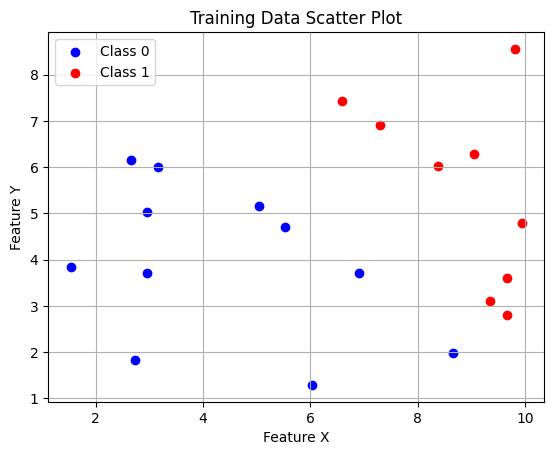

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_plot_training_data(num_points=20):
    """
    Generates 20 random data points and plots them colored by class.
    """
    # Generate 20 random points with 2 features between 1 and 10
    X_train = np.random.rand(num_points, 2) * 9 + 1

    # Assign points to two classes based on a simple rule (e.g., sum of features)
    y_train = (X_train[:, 0] + X_train[:, 1] > 11).astype(int)

    # Create the scatter plot
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='Class 1')

    plt.title('Training Data Scatter Plot')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_train, y_train

# Main section
if __name__ == '__main__':
    print("\n--- A3. Training Data Generation and Plot ---")
    X_train, y_train = generate_and_plot_training_data()

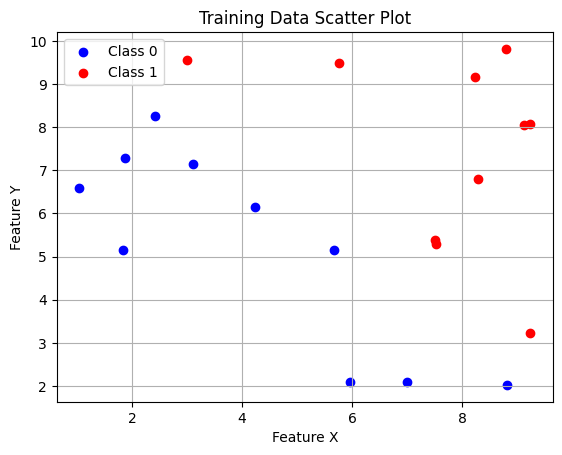


--- A4. Test Data Classification and Boundary ---


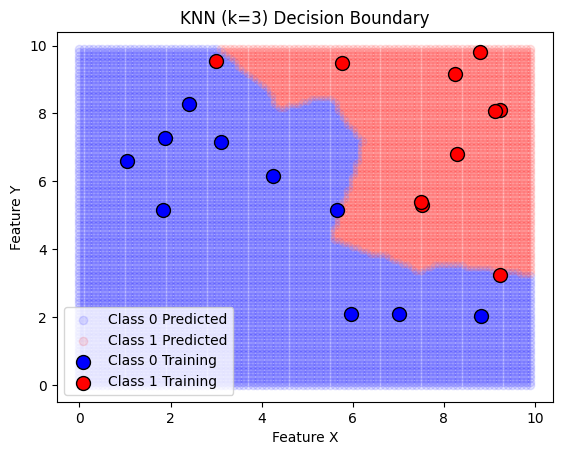

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def create_and_classify_test_data(X_train, y_train, k=3):
    """
    Generates a test set, classifies it using KNN, and plots the results.
    """
    # Generate test data grid
    x_min, x_max = 0, 10
    y_min, y_max = 0, 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    X_test_grid = np.c_[xx.ravel(), yy.ravel()]

    # Train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Classify the test points
    y_test_pred = knn.predict(X_test_grid)

    # Plot the classified test data
    plt.scatter(X_test_grid[y_test_pred == 0, 0], X_test_grid[y_test_pred == 0, 1], c='blue', alpha=0.1, label='Class 0 Predicted')
    plt.scatter(X_test_grid[y_test_pred == 1, 0], X_test_grid[y_test_pred == 1, 1], c='red', alpha=0.1, label='Class 1 Predicted')

    # Overlay the training data for reference
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', edgecolors='k', marker='o', s=100, label='Class 0 Training')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', edgecolors='k', marker='o', s=100, label='Class 1 Training')

    plt.title(f'KNN (k={k}) Decision Boundary')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.legend()
    plt.show()

# Main section
if __name__ == '__main__':
    X_train, y_train = generate_and_plot_training_data()
    print("\n--- A4. Test Data Classification and Boundary ---")
    create_and_classify_test_data(X_train, y_train, k=3)

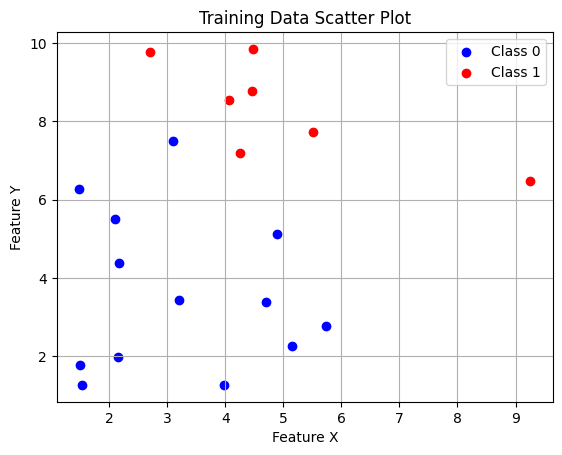


--- A5. Varying k and Observing Boundary Changes ---
Decision boundary for k=1:


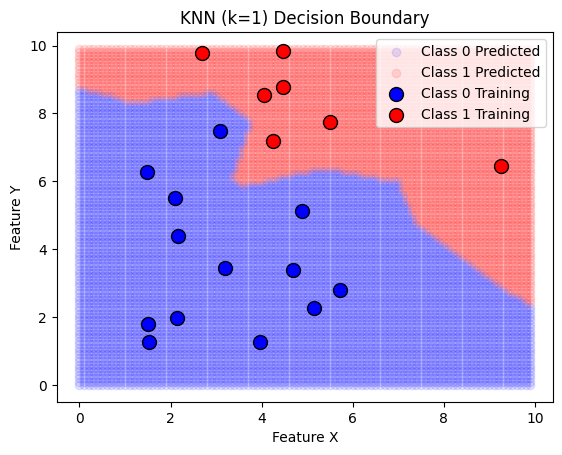

Decision boundary for k=5:


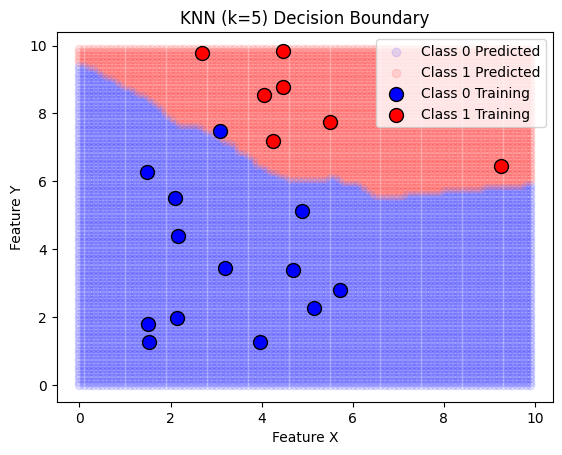

Decision boundary for k=15:


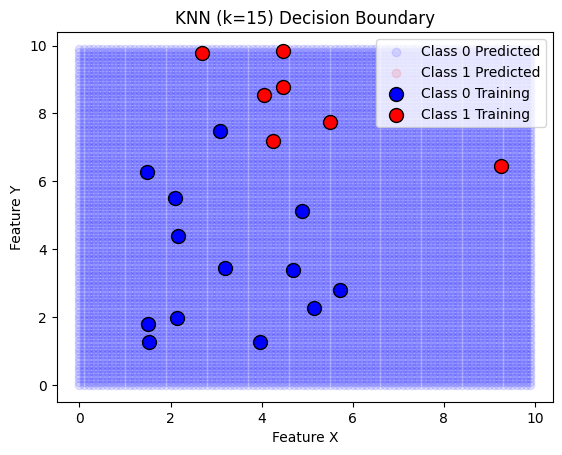

In [ ]:
# Main section
if __name__ == '__main__':
    X_train, y_train = generate_and_plot_training_data()

    print("\n--- A5. Varying k and Observing Boundary Changes ---")
    print("Decision boundary for k=1:")
    create_and_classify_test_data(X_train, y_train, k=1)

    print("Decision boundary for k=5:")
    create_and_classify_test_data(X_train, y_train, k=5)

    print("Decision boundary for k=15:")
    create_and_classify_test_data(X_train, y_train, k=15)

--- A6. Project Data Exercise ---


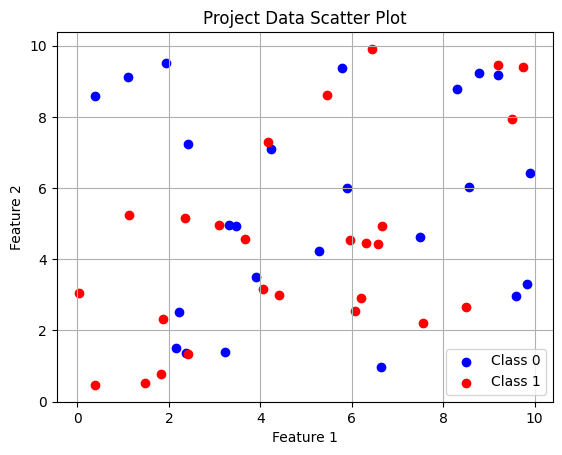


Classifying test data and plotting decision boundary for k=3:


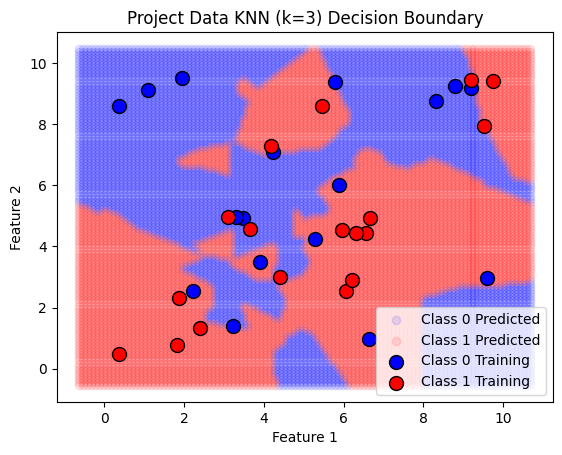


Varying k and plotting decision boundaries:


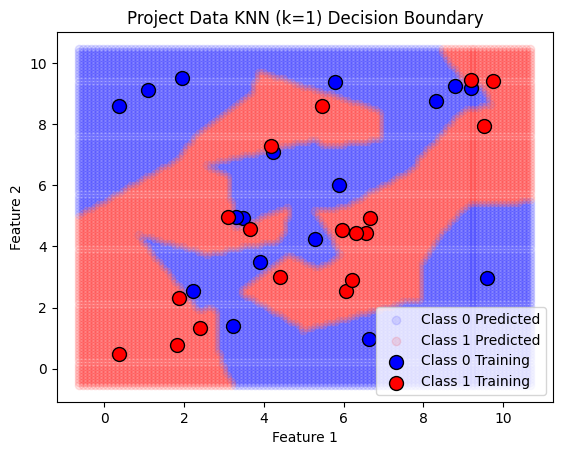

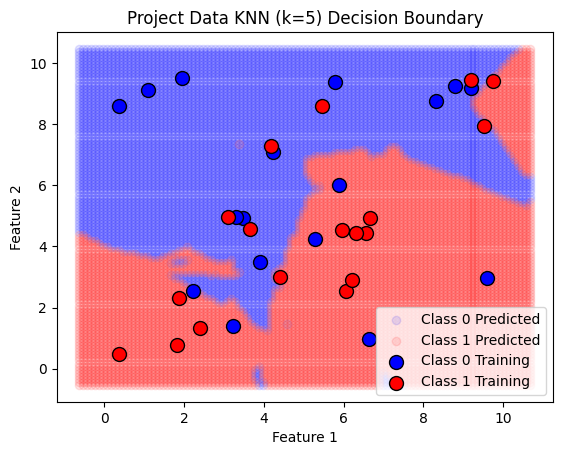

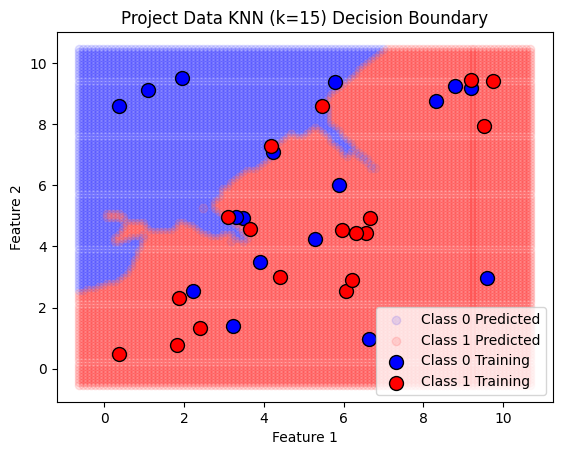

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# --- A3. Training Data and Scatter Plot (using your project data) ---
def load_and_plot_project_data():
    """
    Load your project data and select two features and two classes.
    Then, create a scatter plot.
    """
    # Replace this section with code to load your data (e.g., from a CSV, etc.)
    # and select two features (X) and the corresponding labels (y).
    # For example:
    # project_data = pd.read_csv('your_project_data.csv')
    # X = project_data[['feature_1', 'feature_2']].values
    # y = project_data['class_label'].values
    # Make sure y contains only two classes.

    # Placeholder for project data (replace with your actual data loading)
    X = np.random.rand(50, 2) * 10
    y = np.random.randint(0, 2, 50)

    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')

    plt.title('Project Data Scatter Plot')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    return X, y

# --- A4. Test Data and Classification Boundary (using your project data) ---
def classify_and_plot_project_boundary(X_train, y_train, k=3):
    """
    Generates a test grid, classifies it, and plots the decision boundary.
    """
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    X_test_grid = np.c_[xx.ravel(), yy.ravel()]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_test_pred = knn.predict(X_test_grid)

    plt.scatter(X_test_grid[y_test_pred == 0, 0], X_test_grid[y_test_pred == 0, 1], c='blue', alpha=0.1, label='Class 0 Predicted')
    plt.scatter(X_test_grid[y_test_pred == 1, 0], X_test_grid[y_test_pred == 1, 1], c='red', alpha=0.1, label='Class 1 Predicted')
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', edgecolors='k', marker='o', s=100, label='Class 0 Training')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', edgecolors='k', marker='o', s=100, label='Class 1 Training')

    plt.title(f'Project Data KNN (k={k}) Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Main section
if __name__ == '__main__':
    print("--- A6. Project Data Exercise ---")

    # Load your project data and split into training and test sets
    X, y = load_and_plot_project_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # A4 with your project data
    print("\nClassifying test data and plotting decision boundary for k=3:")
    classify_and_plot_project_boundary(X_train, y_train, k=3)

    # A5 with your project data
    print("\nVarying k and plotting decision boundaries:")
    classify_and_plot_project_boundary(X_train, y_train, k=1)
    classify_and_plot_project_boundary(X_train, y_train, k=5)
    classify_and_plot_project_boundary(X_train, y_train, k=15)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def perform_hyperparameter_tuning(X, y):
    """
    Uses GridSearchCV to find the optimal k for KNN.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the parameter grid to search
    param_grid = {'n_neighbors': np.arange(1, 21, 2)} # Search odd k values from 1 to 19

    # Create a GridSearchCV object
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_['n_neighbors'], grid_search.best_score_

# Main section
if __name__ == '__main__':
    X, y = create_synthetic_data()

    print("\n--- A7. Hyper-parameter Tuning with GridSearchCV ---")
    best_k, best_score = perform_hyperparameter_tuning(X, y)
    print(f"The ideal 'k' value found is: {best_k}")
    print(f"The corresponding best accuracy score is: {best_score:.4f}")


--- A7. Hyper-parameter Tuning with GridSearchCV ---
The ideal 'k' value found is: 13
The corresponding best accuracy score is: 0.6000
